<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/Copy_of_NewTPU_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
from google.colab import drive
import glob, os, re, time, shutil
from os.path import abspath, basename, exists, join
from pathlib import Path

programStart=time.time()
contentPath=os.getcwd()
bullshitPath=join(contentPath, 'sample_data')
if exists(bullshitPath):
    shutil.rmtree(bullshitPath)
    time.sleep(5)
    print(bullshitPath, 'removed')

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/PythonFiles')
print(f'cwd: {Path.cwd()}')
# %ls -l
rootGlobList=glob.glob('**')
for fil in sorted(rootGlobList):
    fullPath=abspath(fil)
    print(f'{fil}')
    print(fullPath)
    print()

os.chdir(contentPath)

impPath = '/content/drive/MyDrive/BashColors.py'
if not exists('BashColors.py'):
    print(contentPath)
    print(impPath)
    shutil.copy2(impPath, contentPath)
    time.sleep(1)
    from BashColors import C
else:
    from BashColors import C
    print(f'{os.path.basename(impPath)}{C.BGreen} exists{C.ColorOff}')


Mounted at /content/drive
cwd: /content/drive/MyDrive/PythonFiles
BashColors.py
/content/drive/MyDrive/PythonFiles/BashColors.py

CleanDrive.py
/content/drive/MyDrive/PythonFiles/CleanDrive.py

CoLab
/content/drive/MyDrive/PythonFiles/CoLab

ColabDriveFiles.py
/content/drive/MyDrive/PythonFiles/ColabDriveFiles.py

FileUtilities.py
/content/drive/MyDrive/PythonFiles/FileUtilities.py

FunctionTimer.py
/content/drive/MyDrive/PythonFiles/FunctionTimer.py

GetColabTPU.py
/content/drive/MyDrive/PythonFiles/GetColabTPU.py

GetTPU.py
/content/drive/MyDrive/PythonFiles/GetTPU.py

GithubRepos.py
/content/drive/MyDrive/PythonFiles/GithubRepos.py

ImportDriveFiles.py
/content/drive/MyDrive/PythonFiles/ImportDriveFiles.py

MountGoogleDrive.py
/content/drive/MyDrive/PythonFiles/MountGoogleDrive.py

TZInfo.py
/content/drive/MyDrive/PythonFiles/TZInfo.py

TarfileFunctions.py
/content/drive/MyDrive/PythonFiles/TarfileFunctions.py

__pycache__
/content/drive/MyDrive/PythonFiles/__pycache__

BashColors.p

In [2]:
%%writefile GetColabTPU.py
# updated: 08/10/2022
import tensorflow as tf

AUTO = tf.data.experimental.AUTOTUNE

class GetTPU:
    # __all__ = [GetTPU, tpu, strategy, gt]

    gt = None
    tpu = None
    strategy = None

    def __init__(self):
        self.AUTO = tf.data.experimental.AUTOTUNE
        self.tpu = None
        self.strategy = None

    def getTPU(self):
        return self.tpu

    def getStrategy(self):
        return self.strategy

    def connectTPU(self):
        # TPUClusterResolver automatically checks connected TPU on all Google platforms
        try:
            self.tpu = None
            # tpu detection
            self.tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
            tf.config.experimental_connect_to_cluster(self.tpu)
            tf.tpu.experimental.initialize_tpu_system(self.tpu)
            self.strategy = tf.distribute.TPUStrategy(self.tpu)

        except ValueError as err: 
            # detect GPUs
            print(err)
            # for GPU or multi-GPU machines
            # self.strategy = tf.distribute.MirroredStrategy()

            # default strategy for CPU and single GPU machines
            self.strategy = tf.distribute.get_strategy()
            
            # for clusters of multi-GPU machines
            # self.strategy=tf.distribute.experimental.MultiWorkerMirroredStrategy()

gt = GetTPU()
gt.connectTPU()
print(f'\nNumber of TPUs: {gt.strategy.num_replicas_in_sync}')

Writing GetColabTPU.py


In [3]:
initStart = time.time()
import GetColabTPU
from GetColabTPU import *
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tpu = gt.getTPU()
strategy = gt.getStrategy()
initEnd = time.time()


Number of TPUs: 8


In [4]:
initTime = (initEnd - initStart)
initTime= round(initTime, 1)
print(f'TPU initialization: {initTime} seconds')

TPU initialization: 14.6 seconds


In [5]:
def get_model():
    # Create a simple model.
    inputs = tf.keras.Input(shape=(32, ))
    outputs = tf.keras.layers.Dense(9)(inputs)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

model = get_model()

# Train the model.
test_input = np.random.random((128 , 32))
test_target = np.random.random((128 , 1))
model.fit(test_input, test_target)

# Calling `save('my_model')` creates a SavedModel folder `my_model`.
# model.save("/gdrive/My Drive/SavedModels")

# It can be used to reconstruct the model identically.
# reconstructed_model = tf.keras.models.load_model("/gdrive/My Drive/SavedModels")

# Let's check:
# np.testing.assert_allclose(model.predict(test_input), reconstructed_model.predict(test_input))

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
# reconstructed_model.fit(test_input, test_target)


4/4 [==============================] - 1s 11ms/step - loss: 0.6772


In [6]:
with strategy.scope(): 
    # creating the model in the TPUStrategy scope places the model on the TPU
    model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [7]:

# For image sizes are available for this dataset
EPOCHS = 12
IMAGE_SIZE = [331, 331]

FLOWERS_DATASETS = { # available image sizes
    192: 'gs://flowers-public/tfrecords-jpeg-192x192-2/*.tfrec',
    224: 'gs://flowers-public/tfrecords-jpeg-224x224/*.tfrec',
    331: 'gs://flowers-public/tfrecords-jpeg-331x331/*.tfrec',
    512: 'gs://flowers-public/tfrecords-jpeg-512x512/*.tfrec'
}
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] # do not change, maps to the labels in the data (folder names)
assert IMAGE_SIZE[0] == IMAGE_SIZE[1], "only square images are supported"
assert IMAGE_SIZE[0] in FLOWERS_DATASETS, "this image size is not supported"


# mixed precision
# On TPU, bfloat16/float32 mixed precision is automatically used in TPU computations.
# Enabling it in Keras also stores relevant variables in bfloat16 format (memory optimization).
# On GPU, specifically V100, mixed precision must be enabled for hardware TensorCores to be used.
# XLA compilation must be enabled for this to work. (On TPU, XLA compilation is the default)
MIXED_PRECISION = False
if MIXED_PRECISION:
    if tpu: 
        policy = tf.keras.mixed_precision.experimental.Policy('mixed_bfloat16')
    else: #
        policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
        tf.config.optimizer.set_jit(True) # XLA compilation
    tf.keras.mixed_precision.experimental.set_policy(policy)
    print('Mixed precision enabled')

# batch and learning rate settings
if strategy.num_replicas_in_sync == 8: 
    # TPU or 8xGPU
    BATCH_SIZE = 16 * strategy.num_replicas_in_sync
    VALIDATION_BATCH_SIZE = 16 * strategy.num_replicas_in_sync
    start_lr = 0.00001
    min_lr = 0.00001
    max_lr = 0.00005 * strategy.num_replicas_in_sync
    rampup_epochs = 5
    sustain_epochs = 0
    exp_decay = .8
elif strategy.num_replicas_in_sync == 1: 
    # single GPU
    BATCH_SIZE = 16
    VALIDATION_BATCH_SIZE = 16
    start_lr = 0.00001
    min_lr = 0.00001
    max_lr = 0.0002
    rampup_epochs = 5
    sustain_epochs = 0
    exp_decay = .8
else: # TPU pod
    BATCH_SIZE = 8 * strategy.num_replicas_in_sync
    VALIDATION_BATCH_SIZE = 8 * strategy.num_replicas_in_sync
    start_lr = 0.00001
    min_lr = 0.00001
    max_lr = 0.00002 * strategy.num_replicas_in_sync
    rampup_epochs = 7
    sustain_epochs = 0
    exp_decay = .8

def lrfn(epoch):
    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        if epoch < rampup_epochs:
            lr = (max_lr - start_lr)/rampup_epochs * epoch + start_lr
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        else:
            lr = (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
        return lr
    return lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay)
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
# plt.plot(rng, [lrfn(x) for x in rng])
# print(y[0], y[-1])

In [8]:

def dataset_to_numpy_util(dataset, N):
  dataset = dataset.unbatch().batch(N)
  for images, labels in dataset:
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    break;  
  return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
  label = np.argmax(label, axis=-1)  # one-hot to class number
  correct_label = np.argmax(correct_label, axis=-1) # one-hot to class number
  correct = (label == correct_label)
  return "{} [{}{}{}]".format(CLASSES[label], str(correct), ', shoud be ' if not correct else '',
                              CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16, color='red' if red else 'black')
    return subplot+1
  
def display_9_images_from_dataset(dataset):
  subplot=331
  plt.figure(figsize=(13,13))
  images, labels = dataset_to_numpy_util(dataset, 9)
  for i, image in enumerate(images):
    title = CLASSES[np.argmax(labels[i], axis=-1)]
    subplot = display_one_flower(image, title, subplot)
    if i >= 8:
      break;
              
  #plt.tight_layout() # bug in tight layout in this version of matplotlib
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_9_images_with_predictions(images, predictions, labels):
  subplot=331
  plt.figure(figsize=(13,13))
  for i, image in enumerate(images):
    title, correct = title_from_label_and_target(predictions[i], labels[i])
    subplot = display_one_flower(image, title, subplot, not correct)
    if i >= 8:
      break;
              
  #plt.tight_layout() # bug in tight layout in this version of matplotlib
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    #plt.tight_layout() # bug in tight layout in this version of matplotlib
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  #ax.set_ylim(0.28,1.05)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [9]:
def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

gcs_pattern = FLOWERS_DATASETS[IMAGE_SIZE[0]]
validation_split = 0.19
filenames = tf.io.gfile.glob(gcs_pattern)
split = len(filenames) - int(len(filenames) * validation_split)
TRAIN_FILENAMES = filenames[:split]
VALID_FILENAMES = filenames[split:]
TRAIN_STEPS = count_data_items(TRAIN_FILENAMES) // BATCH_SIZE
print("TRAINING IMAGES: ", count_data_items(TRAIN_FILENAMES), ", STEPS PER EPOCH: ", TRAIN_STEPS)
print("VALIDATION IMAGES: ", count_data_items(VALID_FILENAMES))
        
def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means scalar
        "one_hot_class": tf.io.VarLenFeature(tf.float32),
    }
    example = tf.io.parse_single_example(example, features)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    class_label = tf.cast(example['class'], tf.int32)
    one_hot_class = tf.sparse.to_dense(example['one_hot_class'])
    one_hot_class = tf.reshape(one_hot_class, [5])
    return image, one_hot_class
    
def force_image_sizes(dataset, image_size):
    # explicit size will be needed for TPU
    reshape_images = lambda image, label: (tf.reshape(image, [*image_size, 3]), label)
    dataset = dataset.map(reshape_images, num_parallel_calls=AUTO)
    return dataset

def load_dataset(filenames):
    # read from TFRecords. For optimal performance, use "interleave(tf.data.TFRecordDataset, ...)"
    # to read from multiple TFRecord files at once and set the option experimental_deterministic = False
    # to allow order-altering optimizations.

    opt = tf.data.Options()
    opt.experimental_deterministic = False

    dataset = tf.data.Dataset.from_tensor_slices(filenames)
    dataset = dataset.with_options(opt)
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
    dataset = force_image_sizes(dataset, IMAGE_SIZE)
    return dataset

def data_augment(image, one_hot_class):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_saturation(image, 0, 2)
    return image, one_hot_class
    
# For experts: fine adjustments of tf.data.Dataset distribution behavior:

# Replicating a datset with state (even random number generator state) does not replicate the
# state and changes the behavior of the dataset. If the state is just the RNG state, it usually
# does not matter but this behavior can be adjusted with tf.data.experimental.ExternalStatePolicy:
#  WARN = 0   (this is the default in Tensorflow outside of Keras)
#  IGNORE = 1 (this is the default in Keras)
#  FAIL = 2

# On TPU pods, the dataset API attempts to shard the dataset across individual TPUs at the file
# level so that TPUs only load the data they will actually train on. This requires more data files 
# than TPUs in the pod. (ex: TPU v3-32 pod = 4 TPUs => dataset must have at least 4 files)
# An error will occur if there are not enough data files. File-level sharding can be disabled:
#  opt = tf.data.Options()
#  opt.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
#  dataset = dataset.with_options(opt)
   

def get_training_dataset():
    dataset = load_dataset(TRAIN_FILENAMES)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset():
    dataset = load_dataset(VALID_FILENAMES)
    dataset = dataset.batch(VALIDATION_BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    
    # needed for TPU 32-core pod: the test dataset has only 3 files but there are 4 TPUs. FILE sharding policy must be disabled.
    opt = tf.data.Options()
    opt.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
    dataset = dataset.with_options(opt)
    
    return dataset


TRAINING IMAGES:  2990 , STEPS PER EPOCH:  23
VALIDATION IMAGES:  680


## training and validation datasets

In [10]:

training_dataset = get_training_dataset()
validation_dataset = get_validation_dataset()

In [11]:
print('validation_dataset')
# display_9_images_from_dataset(validation_dataset)

validation_dataset


## Model

In [12]:
def create_model():
    # pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    # pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
    #pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    pretrained_model.trainable = True

    model = tf.keras.Sequential([pretrained_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 # tf.keras.layers.Flatten(),
                                 
                                 # the float32 is needed on
                                 # softmax layer when using mixed precision
                                 tf.keras.layers.Dense(5, activation='softmax', 
                                                       dtype=tf.float32)])

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary
    return model

In [13]:
with strategy.scope(): 
    # creating the model in the TPUStrategy scope places the model on the TPU
    model = create_model()
print(f'{C.Green}')
model.summary()
model.input_shape

17235968/17225924 [==============================] - 0s 0us/step

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 10, 10, 1024)     3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 3,233,989
Trainable params: 3,212,101
Non-trainable params: 21,888
_________________________________________________________________


(None, 331, 331, 3)

## Training

In [14]:
EPOCHS=12 # 12


In [15]:
start_time= time.time()
with strategy.scope():
    model=create_model()
    history = model.fit(
        training_dataset, validation_data=validation_dataset,
        steps_per_epoch=TRAIN_STEPS, epochs=EPOCHS, callbacks=[lr_callback])
    final_accuracy = history.history["val_accuracy"][-5:]
    print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
    print("TRAINING TIME: ", time.time() - start_time, " seconds")


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/36
23/23 [==============================] - 44s 890ms/step - loss: 2.1797 - accuracy: 0.3074 - val_loss: 2.7325 - val_accuracy: 0.2515 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 8.8e-05.
Epoch 2/36
23/23 [==============================] - 6s 265ms/step - loss: 0.8332 - accuracy: 0.6960 - val_loss: 2.1046 - val_accuracy: 0.5044 - lr: 8.8000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.000166.
Epoch 3/36
23/23 [==============================] - 6s 262ms/step - loss: 0.3444 - accuracy: 0.8859 - val_loss: 1.1784 - val_accuracy: 0.6632 - lr: 1.6600e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000244.
Epoch 4/36
23/23 [==============================] - 6s 263ms/step - loss: 0.2247 - accuracy: 0.9212 - val_loss: 0.3817 - val_accuracy: 0.8676 - lr: 2.4400e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.000322.
Epoch 5/36
23/23 [==============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


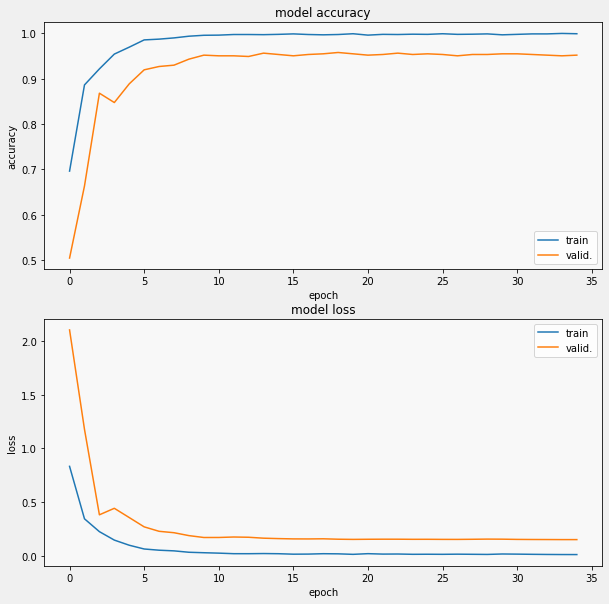

In [16]:
print(history.history.keys())
display_training_curves(history.history['accuracy'][1:], history.history['val_accuracy'][1:], 'accuracy', 211)
display_training_curves(history.history['loss'][1:], history.history['val_loss'][1:], 'loss', 212)

## Predictions

In [17]:
# a couple of images to test predictions too
some_flowers, some_labels = dataset_to_numpy_util(validation_dataset, 160)

10/10 [==============================] - 5s 21ms/step - loss: 0.1689 - accuracy: 0.9313
['dandelion', 'daisy', 'roses', 'sunflowers', 'roses', 'daisy', 'tulips', 'daisy', 'sunflowers', 'tulips', 'roses', 'daisy', 'tulips', 'tulips', 'tulips', 'sunflowers', 'tulips', 'dandelion', 'sunflowers', 'dandelion', 'tulips', 'dandelion', 'tulips', 'tulips', 'tulips', 'roses', 'tulips', 'tulips', 'tulips', 'tulips', 'roses', 'dandelion', 'roses', 'roses', 'roses', 'roses', 'sunflowers', 'dandelion', 'roses', 'tulips', 'sunflowers', 'roses', 'roses', 'dandelion', 'dandelion', 'roses', 'dandelion', 'dandelion', 'tulips', 'dandelion', 'dandelion', 'sunflowers', 'tulips', 'roses', 'tulips', 'daisy', 'dandelion', 'tulips', 'dandelion', 'tulips', 'tulips', 'daisy', 'roses', 'roses', 'daisy', 'tulips', 'dandelion', 'tulips', 'tulips', 'sunflowers', 'tulips', 'roses', 'tulips', 'tulips', 'dandelion', 'daisy', 'sunflowers', 'dandelion', 'dandelion', 'sunflowers', 'tulips', 'roses', 'dandelion', 'dandelion

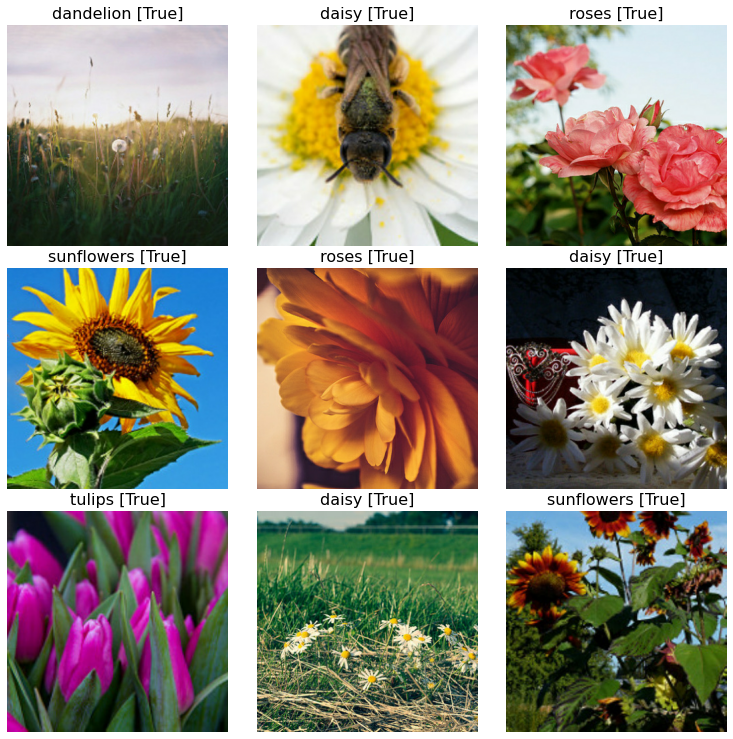

In [18]:
# randomize the input so that you can execute multiple times to change results
permutation = np.random.permutation(8*20)
some_flowers, some_labels = (some_flowers[permutation], some_labels[permutation])

predictions = model.predict(some_flowers, batch_size=16)
evaluations = model.evaluate(some_flowers, some_labels, batch_size=16)
  
print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())
print('[val_loss, val_acc]', evaluations)

display_9_images_with_predictions(some_flowers, predictions, some_labels)

In [19]:
model.save('MobileNet_model.h5')

## Reload the model

10/10 [==============================] - 3s 215ms/step - loss: 0.1708 - accuracy: 0.9375
['dandelion', 'daisy', 'roses', 'sunflowers', 'roses', 'daisy', 'tulips', 'daisy', 'sunflowers', 'tulips', 'roses', 'daisy', 'tulips', 'tulips', 'tulips', 'sunflowers', 'tulips', 'dandelion', 'sunflowers', 'dandelion', 'tulips', 'dandelion', 'tulips', 'tulips', 'tulips', 'roses', 'tulips', 'tulips', 'tulips', 'tulips', 'roses', 'dandelion', 'roses', 'roses', 'roses', 'roses', 'sunflowers', 'dandelion', 'roses', 'tulips', 'sunflowers', 'roses', 'tulips', 'dandelion', 'dandelion', 'roses', 'dandelion', 'dandelion', 'tulips', 'dandelion', 'dandelion', 'sunflowers', 'tulips', 'roses', 'tulips', 'daisy', 'dandelion', 'tulips', 'dandelion', 'tulips', 'tulips', 'daisy', 'roses', 'roses', 'daisy', 'tulips', 'dandelion', 'tulips', 'tulips', 'sunflowers', 'tulips', 'roses', 'tulips', 'tulips', 'dandelion', 'daisy', 'sunflowers', 'dandelion', 'dandelion', 'sunflowers', 'tulips', 'roses', 'dandelion', 'dandeli

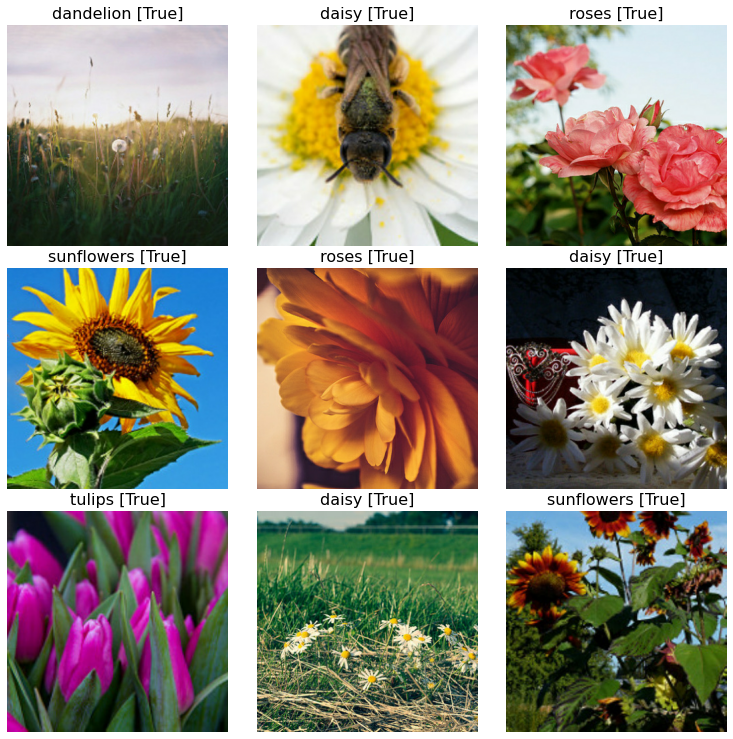

In [20]:
reload_model = tf.keras.models.load_model('MobileNet_model.h5')

predictions = reload_model.predict(some_flowers, batch_size=16)
evaluations = reload_model.evaluate(some_flowers, some_labels, batch_size=16)
print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())
print('[val_loss, val_acc]', evaluations)
print(f'val_loss: {C.IPurple}{evaluations[0]}{C.ColorOff}')
print(f'val_acc: {C.IPurple}{evaluations[1]}{C.ColorOff}')
display_9_images_with_predictions(some_flowers, predictions, some_labels)

In [21]:
programEnd = time.time()
programElapseTime = (programEnd - programStart) / 60
programElapseTime = round(programElapseTime, 2)
print(f'completion in {programElapseTime} minutes')

completion in 5.61 minutes


In [29]:
from os.path import basename
sourcePath='/content/GetColabTPU.py'
destinationPath=join(
    '/content/drive/MyDrive/PythonFiles', basename(sourcePath))
print(destinationPath)
shutil.copy2(sourcePath, destinationPath)

/content/drive/MyDrive/PythonFiles/GetColabTPU.py


'/content/drive/MyDrive/PythonFiles/GetColabTPU.py'

In [ ]:

https://drive.google.com/file/d/1zapfN9H0eO-8T-XoBbbS3qcOcPVvXejZ/view?usp=drivesdk